In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\sskou\Downloads\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

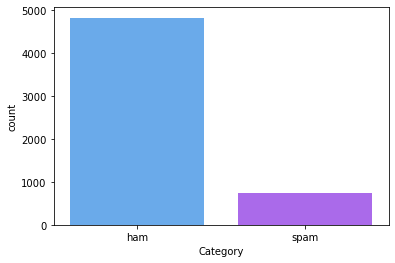

In [6]:
sns.countplot(data=df, palette='cool', x ='Category')

In [7]:
df['label']=df.Category.map({'ham':0,'spam':1})

In [8]:
df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
X=df.Message
y=df.label

In [10]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


# Split Dataset Training and Test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vec=CountVectorizer(stop_words='english')

In [15]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [16]:
vec.vocabulary_

{'mum': 4069,
 'hope': 3050,
 'having': 2942,
 'great': 2828,
 'day': 1918,
 'hoping': 3054,
 'text': 5917,
 'meets': 3872,
 'life': 3580,
 'abiola': 684,
 'smile': 5438,
 'pleasure': 4578,
 'pain': 4398,
 'trouble': 6124,
 'pours': 4657,
 'like': 3590,
 'rain': 4843,
 'sum1': 5746,
 'hurts': 3110,
 'becoz': 1127,
 'loves': 3703,
 'smiling': 5441,
 'ok': 4302,
 'lar': 3504,
 'sleep': 5405,
 'early': 2201,
 'nite': 4197,
 'whos': 6518,
 'class': 1605,
 'general': 2706,
 'price': 4712,
 'lt': 3716,
 'gt': 2849,
 'oz': 4389,
 'let': 3565,
 'know': 3459,
 'want': 6414,
 'yes': 6693,
 'don': 2114,
 'care': 1445,
 'cause': 1480,
 'feel': 2448,
 'nauseous': 4127,
 'pissed': 4552,
 'didn': 2021,
 'eat': 2211,
 'sweets': 5799,
 'week': 6469,
 'today': 6037,
 'planning': 4566,
 'pig': 4542,
 'dieting': 2027,
 'hungry': 3101,
 'hot': 3065,
 'live': 3626,
 'fantasies': 2419,
 '08707509020': 78,
 'just': 3385,
 '20p': 323,
 'min': 3922,
 'ntt': 4247,
 'po': 4591,
 'box': 1272,
 '1327': 260,
 'croyd

In [17]:
print(vec.get_feature_names)
print(len(vec.get_feature_names()))

<bound method CountVectorizer.get_feature_names of CountVectorizer(stop_words='english')>
6731


In [18]:
X_train_transfrom = vec.transform(X_train)
X_test_transfrom = vec.transform(X_test)

In [19]:
print(type(X_train_transfrom))
print(X_train_transfrom)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 684)	1
  (0, 1918)	2
  (0, 2828)	2
  (0, 2942)	1
  (0, 3050)	1
  (0, 3054)	1
  (0, 3580)	1
  (0, 3872)	1
  (0, 4069)	1
  (0, 5917)	1
  (1, 1127)	1
  (1, 3110)	1
  (1, 3590)	1
  (1, 3703)	1
  (1, 4398)	1
  (1, 4578)	1
  (1, 4657)	1
  (1, 4843)	1
  (1, 5438)	5
  (1, 5441)	1
  (1, 5746)	1
  (1, 6124)	1
  (2, 2201)	1
  (2, 3504)	1
  (2, 4197)	1
  :	:
  (3730, 3625)	1
  (3730, 4146)	1
  (3730, 4903)	1
  (3730, 5795)	1
  (3730, 6669)	1
  (3731, 235)	1
  (3731, 287)	1
  (3731, 335)	1
  (3731, 781)	1
  (3731, 1910)	1
  (3731, 2530)	1
  (3731, 3349)	1
  (3731, 3385)	1
  (3731, 3868)	1
  (3731, 4048)	1
  (3731, 4473)	1
  (3731, 4908)	1
  (3731, 4991)	1
  (3731, 5141)	1
  (3731, 5264)	1
  (3731, 5917)	1
  (3731, 5964)	1
  (3731, 6037)	1
  (3732, 1532)	1
  (3732, 5449)	1


Naive Bayes

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
bnb = BernoulliNB()

In [22]:
bnb.fit(X_train_transfrom,y_train)

BernoulliNB()

In [23]:
b_predict=bnb.predict(X_test_transfrom)
b_predict_prob=bnb.predict_proba(X_test_transfrom)

Classification Report

Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,b_predict))

[[1590    1]
 [  51  197]]


<AxesSubplot:>

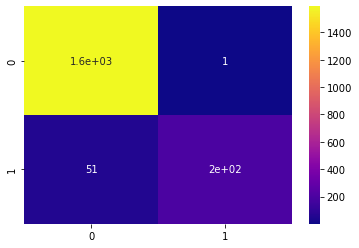

In [25]:
sns.heatmap(confusion_matrix(y_test,b_predict),annot=True, cmap = 'plasma')

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, b_predict)))
print('Precision score: {}'.format(precision_score(y_test, b_predict)))
print('Recall score: {}'.format(recall_score(y_test, b_predict)))
print('F1 score: {}'.format(f1_score(y_test, b_predict)))

Accuracy score: 0.9717237629146275
Precision score: 0.9949494949494949
Recall score: 0.7943548387096774
F1 score: 0.8834080717488789


In [27]:
print(classification_report(y_test,b_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1591
           1       0.99      0.79      0.88       248

    accuracy                           0.97      1839
   macro avg       0.98      0.90      0.93      1839
weighted avg       0.97      0.97      0.97      1839



In [28]:
b_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
b_predict_prob

array([[1.00000000e+00, 1.03239158e-10],
       [1.00000000e+00, 1.02035893e-10],
       [9.99999998e-01, 1.90211831e-09],
       ...,
       [1.00000000e+00, 1.25526387e-10],
       [1.00000000e+00, 9.98911062e-11],
       [1.00000000e+00, 3.60452737e-10]])

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, b_predict_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [31]:
print(roc_auc)

0.9957928671357028


In [32]:
print(true_positive_rate)

[0.         0.22177419 0.25       0.26209677 0.35080645 0.35887097
 0.40725806 0.41532258 0.48387097 0.49193548 0.50403226 0.51209677
 0.58064516 0.58870968 0.60483871 0.61290323 0.66129032 0.66129032
 0.66532258 0.6733871  0.72580645 0.74193548 0.76209677 0.77016129
 0.81048387 0.81048387 0.81048387 0.83064516 0.83064516 0.87096774
 0.87096774 0.89516129 0.90322581 0.90725806 0.90725806 0.90725806
 0.91532258 0.91532258 0.9233871  0.9233871  0.92741935 0.92741935
 0.93951613 0.93951613 0.9516129  0.9516129  0.95564516 0.95564516
 0.95967742 0.95967742 0.96370968 0.96370968 0.96774194 0.96774194
 0.96774194 0.96774194 0.97580645 0.97580645 0.97983871 0.97983871
 0.97983871 0.97983871 0.99193548 0.99193548 0.99193548 0.99193548
 0.99596774 0.99596774 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  

In [33]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.28535512e-04 6.28535512e-04 6.28535512e-04
 6.28535512e-04 6.28535512e-04 6.28535512e-04 6.28535512e-04
 6.28535512e-04 1.25707102e-03 2.51414205e-03 2.51414205e-03
 3.14267756e-03 3.14267756e-03 3.77121307e-03 3.77121307e-03
 3.77121307e-03 3.77121307e-03 4.39974859e-03 5.65681961e-03
 5.65681961e-03 6.28535512e-03 6.28535512e-03 6.91389063e-03
 6.91389063e-03 7.54242615e-03 7.54242615e-03 8.79949717e-03
 8.79949717e-03 1.06851037e-02 1.06851037e-02 1.50848523e-02
 1.50848523e-02 1.82275299e-02 1.82275299e-02 4.52545569e-02
 4.52545569e-02 4.90257700e-02 5.02828410e-02 5.65681961e-02
 5.65681961e-02 8.35952231e-02 8.35952231e-02 8.86235072e-02
 8.98805783e-02 1.02451288e-01 1.02451288e-01 1.14393463e-01
 1.15650534e-01 1.326209

In [34]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999959e-01 9.99999928e-01 9.99999883e-01 9.99999864e-01
 9.99995310e-01 9.99995158e-01 9.99986702e-01 9.99985228e-01
 9.99100384e-01 9.98711619e-01 9.98341909e-01 9.97886134e-01
 9.68855794e-01 9.50242842e-01 8.83438275e-01 8.76203756e-01
 1.53840382e-01 1.24197922e-01 1.17557601e-01 3.69381335e-02
 2.87973464e-02 1.37279507e-03 1.36443182e-03 2.34828267e-04
 1.38349136e-04 1.32128004e-04 6.70187661e-05 5.06038763e-05
 4.42596751e-05 4.21844563e-05 3.45481358e-05 2.62632551e-05
 2.09331042e-05 1.94506809e-05 1.70797256e-05 9.98512015e-06
 4.79987028e-06 3.32655647e-06 2.81610724e-06 1.62774123e-06
 1.25818332e-06 7.34096695e-07 7.33078053e-07 4.45447996e-08
 4.19422151e-08 3.66161850e-08 3.56691023e-08 2.63523164e-08
 2.58518034e-08 1.10513926e-08 1.07397186e-08 9.49595403e-09
 9.25969815e-09 7.12533688e-09 6.98620230e-09 5.31315013e-09
 5.06379222e-09 3.784474

In [35]:
New_dff=pd.DataFrame({'Threshold': thresholds, 'TPR': true_positive_rate, 'FPR':false_positive_rate})

In [36]:
print(New_dff)

        Threshold       TPR       FPR
0    2.000000e+00  0.000000  0.000000
1    1.000000e+00  0.221774  0.000000
2    1.000000e+00  0.250000  0.000000
3    1.000000e+00  0.262097  0.000000
4    1.000000e+00  0.350806  0.000000
..            ...       ...       ...
162  3.349961e-13  1.000000  0.932118
163  3.091588e-13  1.000000  0.933375
164  2.119778e-13  1.000000  0.943432
165  2.014608e-13  1.000000  0.944689
166  6.952875e-17  1.000000  1.000000

[167 rows x 3 columns]


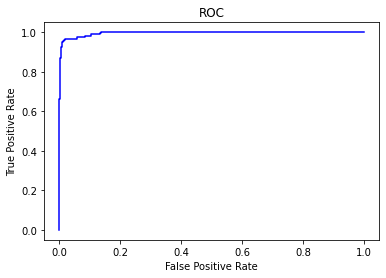

In [37]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, color = 'blue')